In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures



In [2]:
data = pd.read_excel('USD against Turkish lira.xlsx', delimiter = ',', dtype = float)

data = data.fillna(method = 'ffill')

y = np.array(data['Price'])

x = np.arange(1,263)

X = x.reshape(262,1)

y = y.reshape(262,1)


In [3]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X, y)
Lineear_Predict =lin_reg.predict(X)

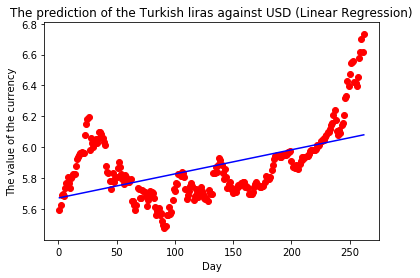

In [4]:
# Visualizing the Linear Regression results
def Get_Linear():
    plt.scatter(X, y, color='Red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('The prediction of the Turkish liras against USD (Linear Regression)')
    plt.xlabel('Day')
    plt.ylabel('The value of the currency')
    plt.show()
    return
Get_Linear()

In [5]:
Linear_Error = 0
for i in range(len(X)):
      Linear_Error1 = Linear_Error + (float(y[i])-float(Lineear_Predict[i]))**2

In [6]:
# Fitting Polynomial Regression to the dataset

poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
Poly_Predict = pol_reg.predict(X_poly)

In [8]:
def Polinomial_Regression():
    plt.scatter(X, y, color='r')
    plt.plot(X, pol_reg.predict(X_poly), color='blue', Linewidth = 3)
    plt.title('Estimated value of the Turkish lira against the USD(01.04.2019-01.04.2020)')
    plt.xlabel('Days of the year ')
    plt.ylabel('Current value of exchange(₺)')
    plt.savefig('Estimated value of the Turkish lira against the USD')
    plt.show()
    return

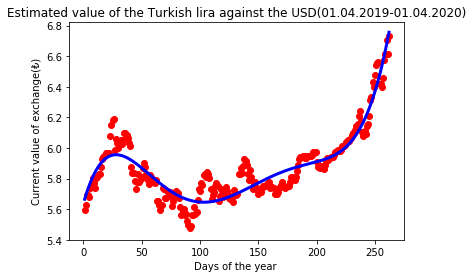

In [9]:
Polinomial_Regression()


In [10]:
polinomial_error = 0    
Total_Error =[]    

# this loop is used for finding the best polinomial degree for the regression
# we are able sum all the Error when the degre is 1,2,3 ... etc. 
# then  we can detect the best degree for the regression 
for k in range(100):
    poly_reg = PolynomialFeatures(degree=k+1)
    X_poly = poly_reg.fit_transform(X)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    b = pol_reg.predict(X_poly)
    for p in range(len(X_poly)):
        # The sum of squares between the real currency values(y) and the predicted values(X_poly)
        polinomial_error = polinomial_error + (float(y[p])-float(pol_reg.predict(X_poly)[p]))**2
    # print(polinomial_error1)
    Total_Error.append(polinomial_error)
    polinomial_error = 0
        
   
print(Total_Error.index(min(Total_Error)))

5
